<a href="https://colab.research.google.com/github/panghanwu/build_neural_network_python/blob/main/overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

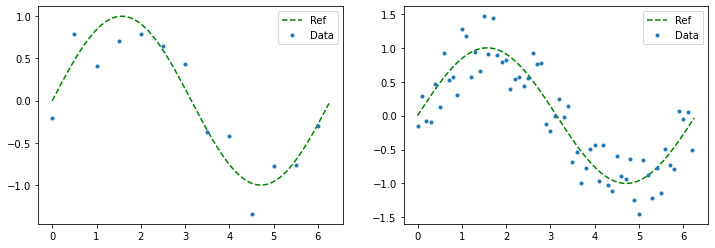

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""Prepare data"""

# correct answer
x = np.arange(0, 2*np.pi, 0.05)
y = np.sin(x)

# small data
x1 = np.arange(0, 2*np.pi, 0.5)
y1 = np.sin(x1) + 0.5*np.random.uniform(-1,1,len(x1))

# large data
x2 = np.arange(0, 2*np.pi, 0.1)
y2 = np.sin(x2) + 0.5*np.random.uniform(-1,1,len(x2))

# plot
plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
ax1.plot(x, y, 'g--', label='Ref')
ax1.plot(x1, y1, '.', label='Data')
ax2 = plt.subplot(1,2,2)
ax2.plot(x, y, 'g--', label='Ref')
ax2.plot(x2, y2, '.', label='Data')
ax1.legend()
ax2.legend()
plt.show()

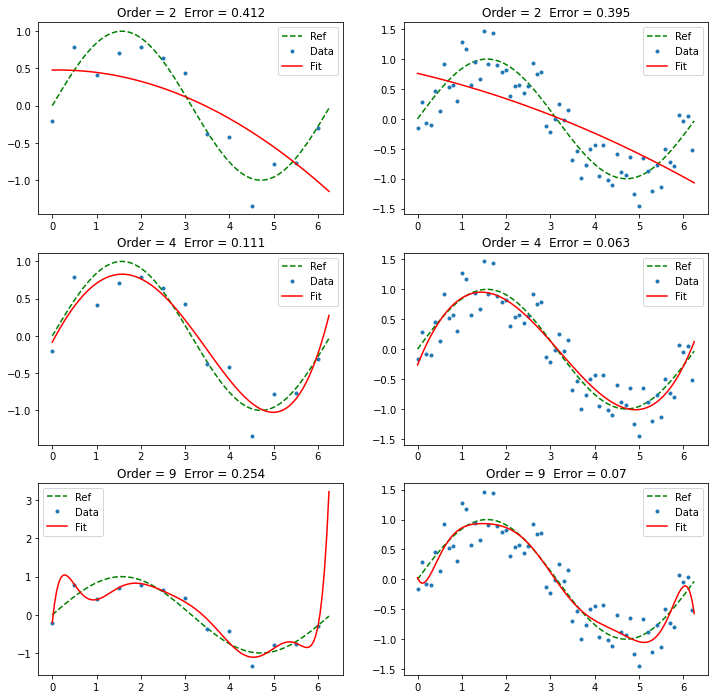

In [2]:
"""Polynomial"""

# low-order fitting
low_order = 2
z1_low = np.polyfit(x1, y1, low_order)
z2_low = np.polyfit(x2, y2, low_order)

# middle-order fitting
mid_order = 4
z1_mid = np.polyfit(x1, y1, mid_order)
z2_mid = np.polyfit(x2, y2, mid_order)

# high-order fitting
high_order = 9
z1_high = np.polyfit(x1, y1, high_order)
z2_high = np.polyfit(x2, y2, high_order)

def error(fit, ref):
  return round(np.sum(abs(fit-ref))/len(ref), 3)

# plot
plt.figure(figsize=(12,12))
ax11 = plt.subplot(3,2,1)
plt.title('Order = '+str(low_order)+'  Error = '+str(error(np.poly1d(z1_low)(x), y)))
ax11.plot(x, y, 'g--', label='Ref')
ax11.plot(x1, y1, '.', label='Data')
ax11.plot(x, np.poly1d(z1_low)(x), 'r', label='Fit')
ax11.legend()

ax12 = plt.subplot(3,2,2)
plt.title('Order = '+str(low_order)+'  Error = '+str(error(np.poly1d(z2_low)(x), y)))
ax12.plot(x, y, 'g--', label='Ref')
ax12.plot(x2, y2, '.', label='Data')
ax12.plot(x, np.poly1d(z2_low)(x), 'r', label='Fit')
ax12.legend()

ax21 = plt.subplot(3,2,3)
plt.title('Order = '+str(mid_order)+'  Error = '+str(error(np.poly1d(z1_mid)(x), y)))
ax21.plot(x, y, 'g--', label='Ref')
ax21.plot(x1, y1, '.', label='Data')
ax21.plot(x, np.poly1d(z1_mid)(x), 'r', label='Fit')
ax21.legend()

ax22 = plt.subplot(3,2,4)
plt.title('Order = '+str(mid_order)+'  Error = '+str(error(np.poly1d(z2_mid)(x), y)))
ax22.plot(x, y, 'g--', label='Ref')
ax22.plot(x2, y2, '.', label='Data')
ax22.plot(x, np.poly1d(z2_mid)(x), 'r', label='Fit')
ax22.legend()

ax31 = plt.subplot(3,2,5)
plt.title('Order = '+str(high_order)+'  Error = '+str(error(np.poly1d(z1_high)(x), y)))
ax31.plot(x, y, 'g--', label='Ref')
ax31.plot(x1, y1, '.', label='Data')
ax31.plot(x, np.poly1d(z1_high)(x), 'r', label='Fit')
ax31.legend()

ax32 = plt.subplot(3,2,6)
plt.title('Order = '+str(high_order)+'  Error = '+str(error(np.poly1d(z2_high)(x), y)))
ax32.plot(x, y, 'g--', label='Ref')
ax32.plot(x2, y2, '.', label='Data')
ax32.plot(x, np.poly1d(z2_high)(x), 'r', label='Fit')
ax32.legend()

plt.show()


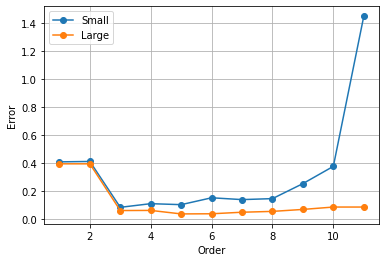

In [3]:
# error vs. order
z1 = []
z2 = []
order = np.arange(1,12,1)
for n in order:
  z1_fit = np.polyfit(x1, y1, n)
  z1.append(error(np.poly1d(z1_fit)(x), y))
  z2_fit = np.polyfit(x2, y2, n)
  z2.append(error(np.poly1d(z2_fit)(x), y))

plt.plot(order, z1, 'o-', label='Small')
plt.plot(order, z2, 'o-', label='Large')
plt.xlabel('Order')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

In [4]:
"""Perceptron"""
# define function
class MiddleLayer:
  def __init__(self, n_upper, n):
    self.w1 = 0.01 * np.random.randn(n_upper, n)
    self.b1 = 0.01 * np.random.randn(n)

  def forward(self, x):
    self.x = x
    u1 = np.dot(x, self.w1) + self.b1
    self.y1 = 1/(1+np.exp(-u1))  # sigmoid
  
  def backward(self, grad_y1):
    delta1 = grad_y1 * (1-self.y1) * self.y1
    self.grad_w1 = np.dot(self.x.T, delta1)
    self.grad_b1 = np.sum(delta1, axis=0)
  
  def update(self, eta):
    self.w1 -= eta * self.grad_w1
    self.b1 -= eta * self.grad_b1


class OutputLayer:
  def __init__(self, n_upper, n):
    self.w2 = 0.01 * np.random.randn(n_upper, n)
    self.b2 = 0.01 * np.random.randn(n)
  
  def forward(self, y1):
    self.y1 = y1
    u2 = np.dot(y1, self.w2) + self.b2
    self.y2 = u2
  
  def backward(self, t):
    delta2 = self.y2 - t
    self.grad_w2 = np.dot(self.y1.T, delta2)
    self.grad_b2 = np.sum(delta2, axis=0)
    self.grad_y1 = np.dot(delta2, self.w2.T)
  
  def update(self, eta):
    self.w2 -= eta * self.grad_w2
    self.b2 -= eta * self.grad_b2

# three layers & training
def three_layers(n_in, n_mid, n_out, epoch, train_x, train_y, input_x):
  # parameter
  n_data = len(train_x)
  eta = 0.1
  # create
  middle_layer = MiddleLayer(n_in, n_mid)
  output_layer = OutputLayer(n_mid, n_out)
  # training
  for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
  
    for idx in index_random:
      x = train_x[idx]
      t = train_y[idx]

      middle_layer.forward(x.reshape(1,1))
      output_layer.forward(middle_layer.y1)

      output_layer.backward(t.reshape(1,1))
      middle_layer.backward(output_layer.grad_y1)

      middle_layer.update(eta)
      output_layer.update(eta)
  # fitting result
  middle_layer.forward(input_x.reshape(-1,1))
  output_layer.forward(middle_layer.y1)
  return output_layer.y2.reshape(-1)

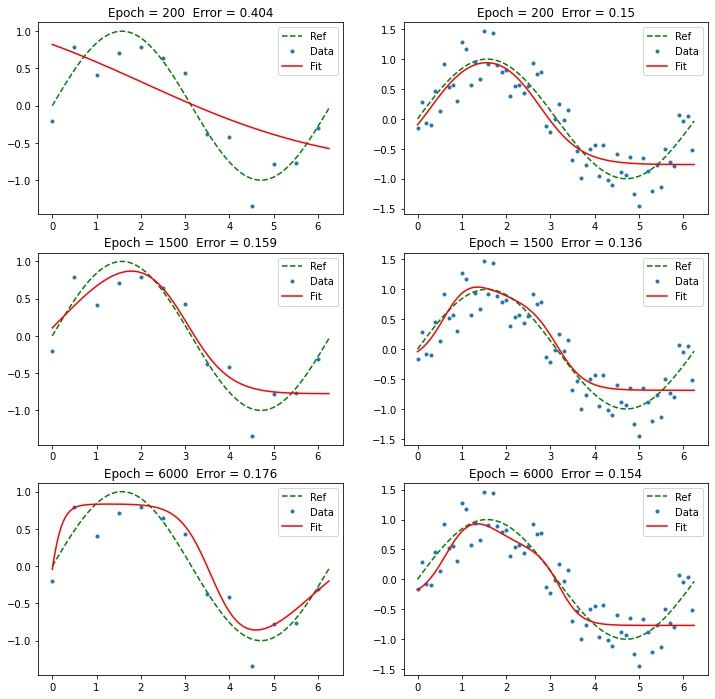

In [5]:
short_epoch = 200
p1_short = three_layers(1, 3, 1, short_epoch, x1, y1, x)
p2_short = three_layers(1, 3, 1, short_epoch, x2, y2, x)

mid_epoch = 1500
p1_mid = three_layers(1, 3, 1, mid_epoch, x1, y1, x)
p2_mid = three_layers(1, 3, 1, mid_epoch, x2, y2, x)

long_epoch = 6000
p1_long = three_layers(1, 3, 1, long_epoch, x1, y1, x)
p2_long = three_layers(1, 3, 1, long_epoch, x2, y2, x)


# plot


plt.figure(figsize=(12,12))
ax11 = plt.subplot(3,2,1)
plt.title('Epoch = '+str(short_epoch)+'  Error = '+str(error(p1_short, y)))
ax11.plot(x, y, 'g--', label='Ref')
ax11.plot(x1, y1, '.', label='Data')
ax11.plot(x, p1_short, 'r', label='Fit')
ax11.legend()

ax12 = plt.subplot(3,2,2)
plt.title('Epoch = '+str(short_epoch)+'  Error = '+str(error(p2_short, y)))
ax12.plot(x, y, 'g--', label='Ref')
ax12.plot(x2, y2, '.', label='Data')
ax12.plot(x, p2_short, 'r', label='Fit')
ax12.legend()

ax21 = plt.subplot(3,2,3)
plt.title('Epoch = '+str(mid_epoch)+'  Error = '+str(error(p1_mid, y)))
ax21.plot(x, y, 'g--', label='Ref')
ax21.plot(x1, y1, '.', label='Data')
ax21.plot(x, p1_mid, 'r', label='Fit')
ax21.legend()

ax22 = plt.subplot(3,2,4)
plt.title('Epoch = '+str(mid_epoch)+'  Error = '+str(error(p2_mid, y)))
ax22.plot(x, y, 'g--', label='Ref')
ax22.plot(x2, y2, '.', label='Data')
ax22.plot(x, p2_mid, 'r', label='Fit')
ax22.legend()

ax31 = plt.subplot(3,2,5)
plt.title('Epoch = '+str(long_epoch)+'  Error = '+str(error(p1_long, y)))
ax31.plot(x, y, 'g--', label='Ref')
ax31.plot(x1, y1, '.', label='Data')
ax31.plot(x, p1_long, 'r', label='Fit')
ax31.legend()

ax32 = plt.subplot(3,2,6)
plt.title('Epoch = '+str(long_epoch)+'  Error = '+str(error(p2_long, y)))
ax32.plot(x, y, 'g--', label='Ref')
ax32.plot(x2, y2, '.', label='Data')
ax32.plot(x, p2_long, 'r', label='Fit')
ax32.legend()

plt.show()

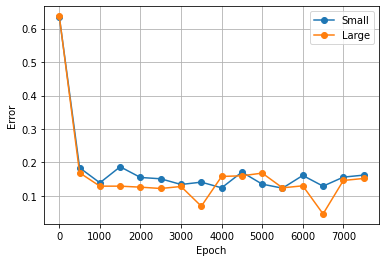

In [6]:
# error vs. Epoch
p1 = []
p2 = []
epoch = np.arange(1,8000,500)
for n in epoch:
  p1_fit = three_layers(1, 3, 1, n, x1, y1, x)
  p1.append(error(p1_fit, y))
  p2_fit = three_layers(1, 3, 1, n, x2, y2, x)
  p2.append(error(p2_fit, y))

plt.plot(epoch, p1, 'o-', label='Small')
plt.plot(epoch, p2, 'o-', label='Large')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()